In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('bob.jpeg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
gray = gray.astype(np.uint8)

# Performing Edge detection

(-0.5, 176.5, 284.5, -0.5)

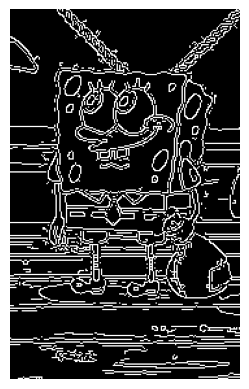

In [62]:
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')
plt.axis('off')

# Find lines using Hough transform

(-0.5, 176.5, 284.5, -0.5)

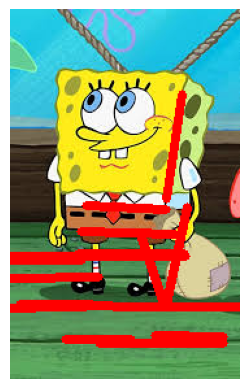

In [ ]:
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5
line_image = np.copy(image_copy)
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)
plt.axis('off')

# Harris Corner Detection

# Detect corners

(-0.5, 176.5, 284.5, -0.5)

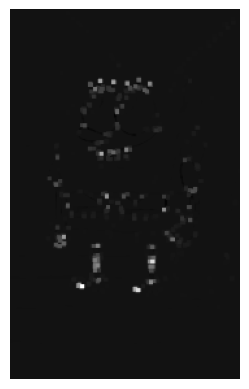

In [ ]:
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')
plt.axis('off')

# Extract and display strong corners

(-0.5, 176.5, 284.5, -0.5)

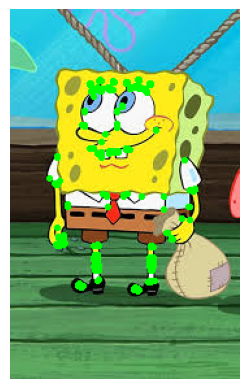

In [ ]:
thresh = 0.1*dst.max()

corner_image = np.copy(image_copy)

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)
plt.axis('off')

# Image Segmentation

In [70]:
db_img = cv2.imread('download.png')

db_img = db_img.astype(np.uint8)

In [68]:
db_img = cv2.imread('square.jpeg')

db_img = db_img.astype(np.uint8)

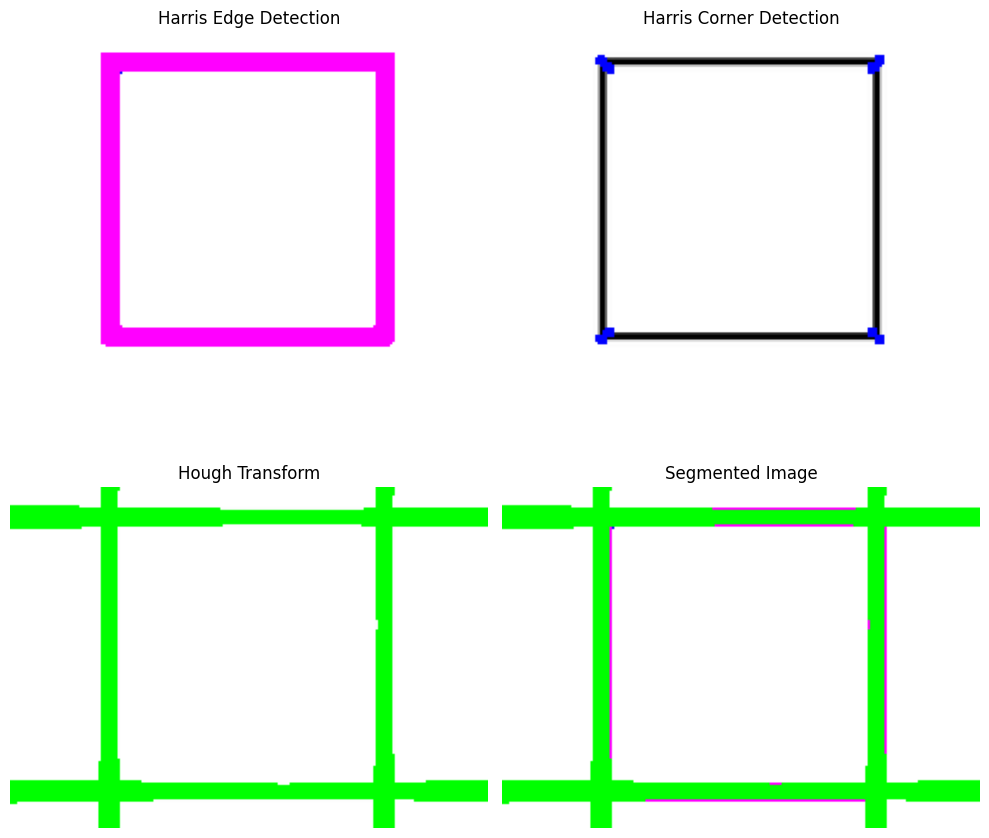

In [ ]:
if len(db_img.shape) == 3:
    db_img = cv2.cvtColor(db_img, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
image_float = np.float32(db_img)
dst = cv2.cornerHarris(image_float, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
harris_corners = cv2.cvtColor(db_img, cv2.COLOR_GRAY2BGR)
harris_corners[dst > 0.01 * dst.max()] = [0, 0, 255]

# Harris Edge Detection
edges = cv2.Canny(db_img, 50, 150)
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(edges, kernel)
harris_edges = harris_corners.copy()
harris_edges[dilated_edges > 0] = [255, 0, 255]

# Hough Line Transform
hough_transform = cv2.cvtColor(db_img, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 50)

if lines is not None:
    for rho, theta in lines[:, 0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
        cv2.line(hough_transform, (x1, y1), (x2, y2), (0, 255, 0), 2)


segmented_image = harris_edges.copy()
if lines is not None:
    for rho, theta in lines[:, 0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
        cv2.line(segmented_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(harris_edges)
axes[0, 0].set_title("Harris Edge Detection")
axes[0, 0].axis("off")

axes[0, 1].imshow(harris_corners)
axes[0, 1].set_title("Harris Corner Detection")
axes[0, 1].axis("off")

axes[1, 0].imshow(hough_transform)
axes[1, 0].set_title("Hough Transform")
axes[1, 0].axis("off")

axes[1, 1].imshow(segmented_image)
axes[1, 1].set_title("Segmented Image")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()